<a href="https://colab.research.google.com/github/ramirezzzluisss/pythonprojects/blob/main/HonorsThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Thesis Data Analysis
## Utah DOPL Contractor Credit Qualtrics Survey

In [3]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import textwrap
from itertools import product

In [4]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# connect to csv data file

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/UtahContractorSurvey202304111609.csv')

Mounted at /content/gdrive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              2508 non-null   object
 1   EndDate                2508 non-null   object
 2   Status                 2508 non-null   object
 3   IPAddress              2500 non-null   object
 4   Progress               2508 non-null   object
 5   Duration (in seconds)  2508 non-null   object
 6   Finished               2508 non-null   object
 7   RecordedDate           2508 non-null   object
 8   ResponseId             2508 non-null   object
 9   RecipientLastName      2 non-null      object
 10  RecipientFirstName     2 non-null      object
 11  RecipientEmail         2 non-null      object
 12  ExternalReference      2 non-null      object
 13  LocationLatitude       1952 non-null   object
 14  LocationLongitude      1952 non-null   object
 15  DistributionChannel  

In [7]:
df.head(15)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q21_8_TEXT,Q22,Q29
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Has your business been approved for a loan thr...,Has your business been approved for a business...,How would you rate your relationship with your...,Is your accountant or tax preparer a Certified...,How much revenue/sales did your business make ...,What is your business's total outstanding busi...,What is the top source of financing for your b...,What is the top source of financing for your b...,Which of the following Utah consulting service...,Enter your phone number if you are interested ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID20_8_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID28_TEXT""}"
2,2023-02-13 15:10:50,2023-02-13 15:12:01,Survey Preview,NaN,100,70,True,2023-02-13 15:12:01,R_1lidpbGA9ypeT2L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-16 21:46:47,2023-02-16 21:50:44,Survey Preview,NaN,100,236,True,2023-02-16 21:50:45,R_1CHhLtsrT1hBKQ4,NaN,...,Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-27 13:45:55,2023-02-27 13:48:28,Survey Preview,NaN,100,152,True,2023-02-27 13:48:29,R_2QYbxOXJxwk7sRc,NaN,...,Did not apply,Did not apply,No Relationship,I DO NOT know,$100k - $250k,$0,Local Bank or Credit Union,NaN,"Small Business Administration,Small Business D...",NaN
5,2023-02-27 14:43:19,2023-02-27 14:43:48,Survey Preview,NaN,100,29,True,2023-02-27 14:43:49,R_RrwxY3MgIlhiidP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-03-03 10:49:34,2023-03-03 10:51:27,Survey Preview,NaN,100,112,True,2023-03-03 10:51:28,R_pSEuN2bwWsxMxyN,NaN,...,Did not apply,Did not apply,No Relationship,No,$100k - $250k,$0,Personal and Family Savings,NaN,"Small Business Administration,Suazo Business C...",NaN
7,2023-03-03 10:51:33,2023-03-03 10:51:47,Survey Preview,NaN,100,13,True,2023-03-03 10:51:49,R_2AXXEMMkIVqtM7g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN


In [8]:
# clean data
df.rename(columns = {'Q2':'LicenseClassification',
                     'Q3':'EntityType',
                     'Q4':'LatinxShareholders',
                     'Q5':'Age',
                     'Q6':'YearsofExperience',
                     'Q7':'ConstructionFocus',
                     'Q8':'LEED',
                     'Q9':'BusinessPlan',
                     'Q10':'EINApplication',
                     'Q11':'NumOfEmployees',
                     'Q12':'LatinxEmployeesPercent',
                     'Q13':'WorkAccidents',
                     'Q14':'SBALoan',
                     'Q15':'PPPLoan',
                     'Q16':'BankCreditUnionLoan',
                     'Q17':'LoanOfficerRelationship',
                     'Q18':'AccountantCPA',
                     'Q19':'Revenue2022',
                     'Q20':'TotalOutstandingDebt',
                     'Q21':'TopFinancingSource',
                     'Q22':'ConsultingServices',
                     'Q23':'RaceAndEthnicity',
                     'Q24':'Gender',
                     'Q25':'Education',
                     'Q26':'CreditScore',
                     'Q27':'HomeOwner',
                     'Q28':'EnglishLanguage',
                     'Q29':'PhoneNumber',
                     }, inplace = True)

# delete first 8 rows
df_clean = df.iloc[8:]

# drop null rows
df_clean = df_clean.dropna(axis=0, subset=['RaceAndEthnicity'])

df_clean = df_clean[(df_clean['EntityType'] != 'I am RETIRED')]

# change race
# df_clean['RaceAndEthnicity'].replace('Hispanic or Latino/a/x', 'Latinx')
# df_clean['RaceAndEthnicity'].replace('Black or African American', 'Black')
# df_clean['RaceAndEthnicity'].replace('Native Hawaiian or Pacific Islander', 'Pacific Islander')
# df_clean['RaceAndEthnicity'].replace('American Indian or Alaskan Native', 'Native American')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 8 to 2507
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StartDate                1937 non-null   object
 1   EndDate                  1937 non-null   object
 2   Status                   1937 non-null   object
 3   IPAddress                1937 non-null   object
 4   Progress                 1937 non-null   object
 5   Duration (in seconds)    1937 non-null   object
 6   Finished                 1937 non-null   object
 7   RecordedDate             1937 non-null   object
 8   ResponseId               1937 non-null   object
 9   RecipientLastName        0 non-null      object
 10  RecipientFirstName       0 non-null      object
 11  RecipientEmail           0 non-null      object
 12  ExternalReference        0 non-null      object
 13  LocationLatitude         1928 non-null   object
 14  LocationLongitude        1928 non-null  

In [9]:
df_clean.head(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,TopFinancingSource,Q21_8_TEXT,ConsultingServices,PhoneNumber
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN
10,2023-03-03 11:20:13,2023-03-03 11:24:58,IP Address,73.127.32.5,100,284,True,2023-03-03 11:24:58,R_3nT79TKTyBgzdQf,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$0,Personal and Family Savings,NaN,"Small Business Administration,Small Business D...",NaN
11,2023-03-03 11:24:01,2023-03-03 11:27:40,IP Address,74.68.107.21,100,219,True,2023-03-03 11:27:41,R_3oMkMuBaB0VM7og,NaN,...,Approved,Did not apply,Excellent,No,More than $1M,$100k-$250k,Personal and Family Savings,NaN,Small Business Administration,NaN
12,2023-03-03 11:29:05,2023-03-03 11:31:45,IP Address,73.65.139.97,100,159,True,2023-03-03 11:31:45,R_1gA5HrPFMm9DM6N,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$25k-$100k,Business Credit Card,NaN,Small Business Administration,8018791018


In [10]:
df_clean['Revenue2022'].unique()
df_clean['Revenue2022'] = pd.Categorical(df_clean['Revenue2022'],
                                         categories = ['$0', '$25k or less', '$25k - $100k', '$100k - $250k', '$250k - $1M', 'More than $1M'],
                                         ordered = True)

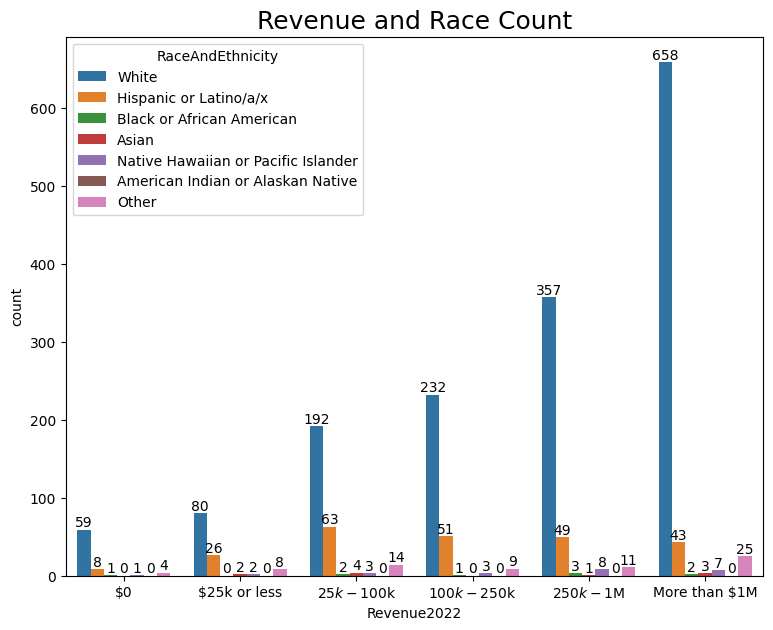

In [11]:
plt.figure(figsize=(9,7))
hue_order = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
             'Native Hawaiian or Pacific Islander', 'American Indian or Alaskan Native',
             'Other']

ax = sns.countplot(x = 'Revenue2022', hue = 'RaceAndEthnicity', hue_order = hue_order, data = df_clean)
#Add title
plt.title('Revenue and Race Count', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

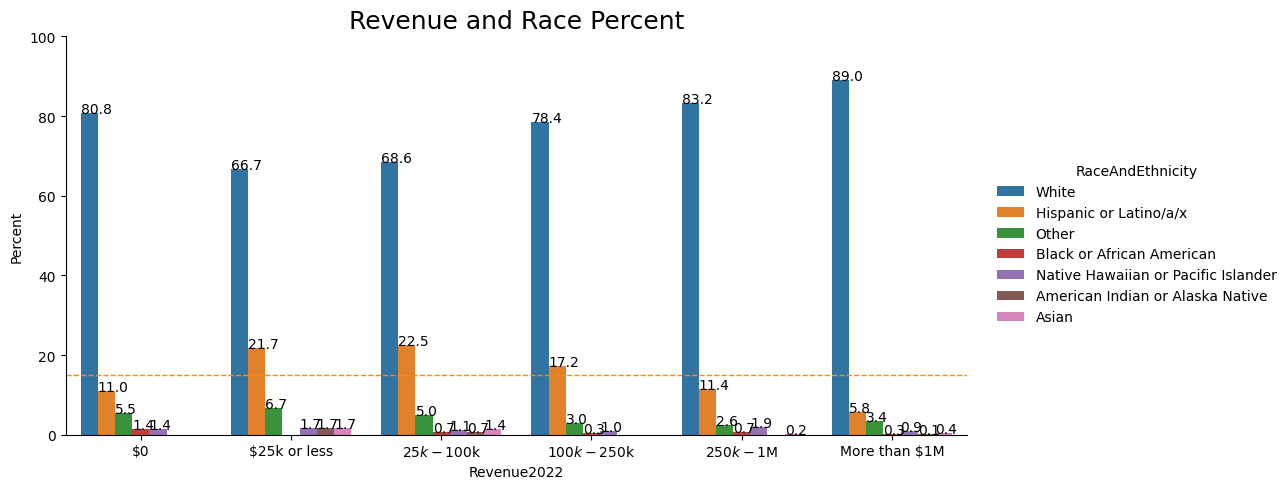

In [12]:
# convert to percentages
new_df = df_clean.groupby('Revenue2022')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='Revenue2022', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1))
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Revenue and Race Percent', fontsize=18)
g.map(plt.axhline, y=15, ls='--', color='darkorange', linewidth=1)

In [13]:
df_clean['BankCreditUnionLoan'] = pd.Categorical(df_clean['BankCreditUnionLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

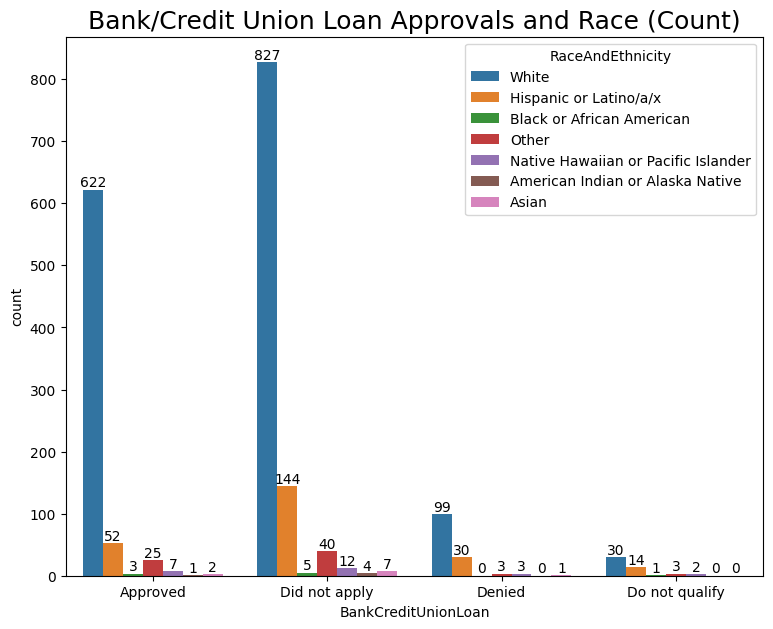

In [14]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'BankCreditUnionLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Bank/Credit Union Loan Approvals and Race (Count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

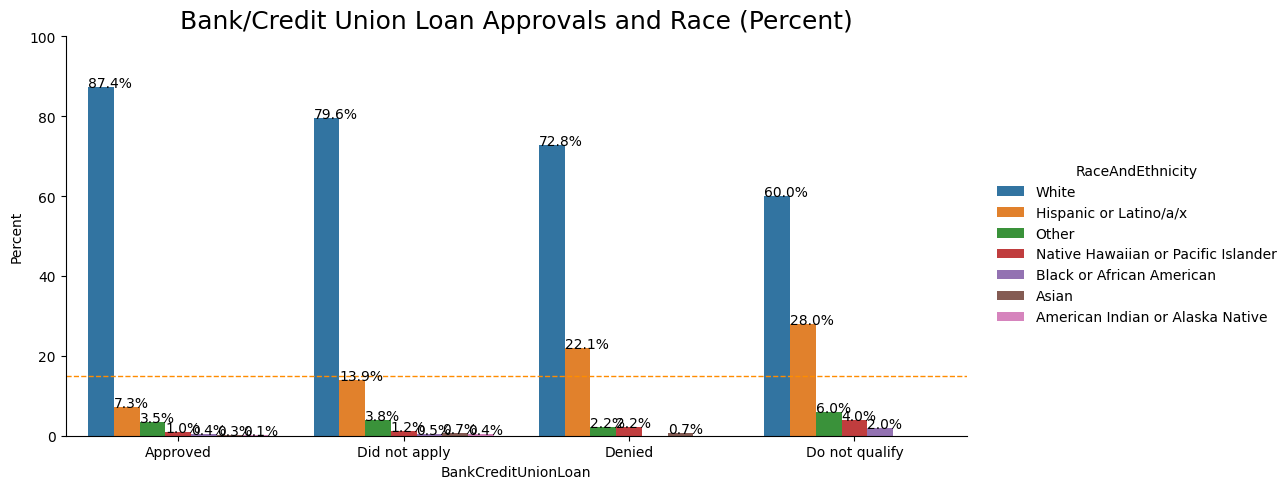

In [15]:
# convert to percentages
new_df = df_clean.groupby('BankCreditUnionLoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='BankCreditUnionLoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Bank/Credit Union Loan Approvals and Race (Percent)', fontsize=18)
g.map(plt.axhline, y=15, ls='--', color='darkorange', linewidth=1)

# add a line at 15 percent for latinx population in utah?

In [16]:
df_clean['SBALoan'] = pd.Categorical(df_clean['SBALoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

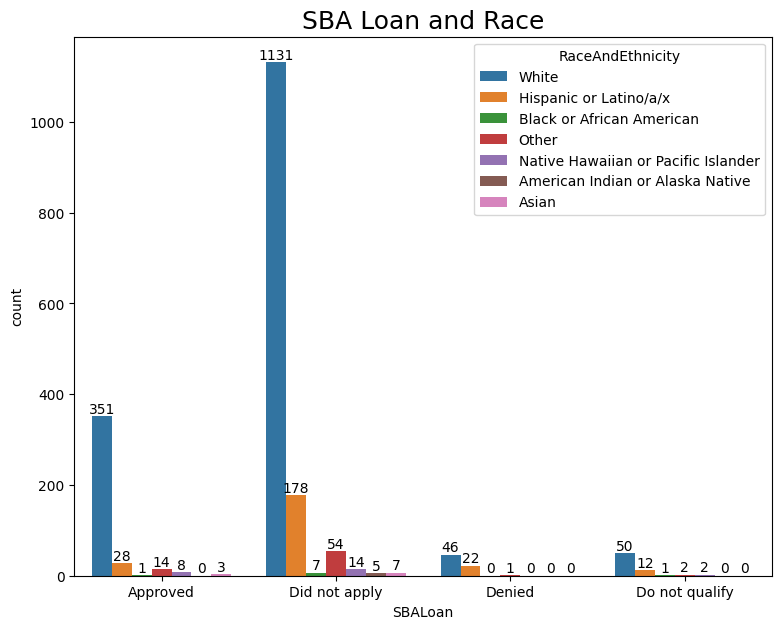

In [17]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'SBALoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('SBA Loan and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

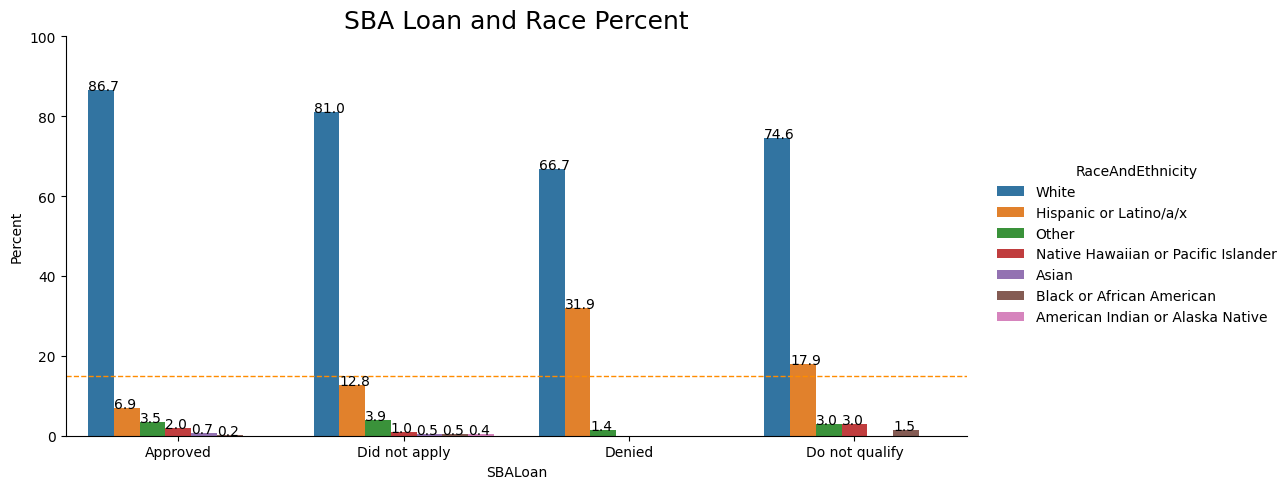

In [18]:
# convert to percentages
new_df = df_clean.groupby('SBALoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='SBALoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1))
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('SBA Loan and Race Percent', fontsize=18)
g.map(plt.axhline, y=15, ls='--', color='darkorange', linewidth=1)

In [19]:
df_clean['PPPLoan'] = pd.Categorical(df_clean['PPPLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

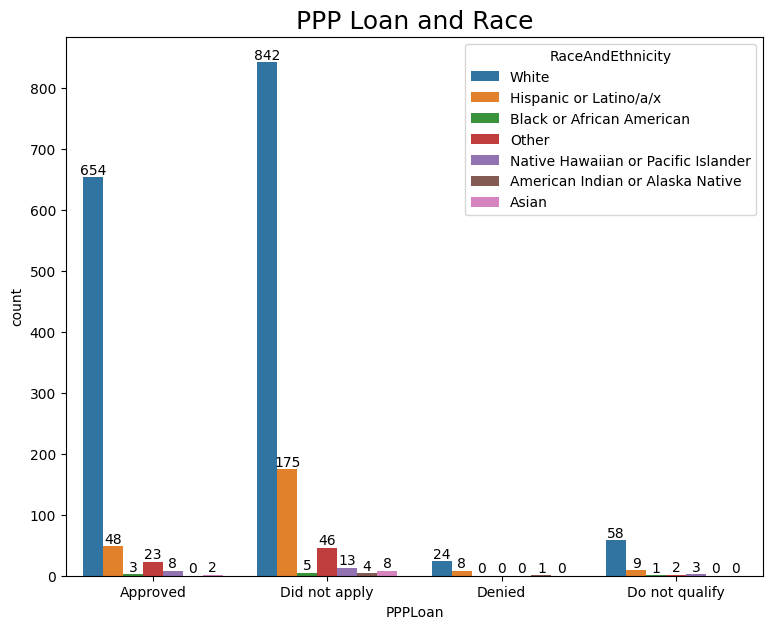

In [20]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'PPPLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('PPP Loan and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

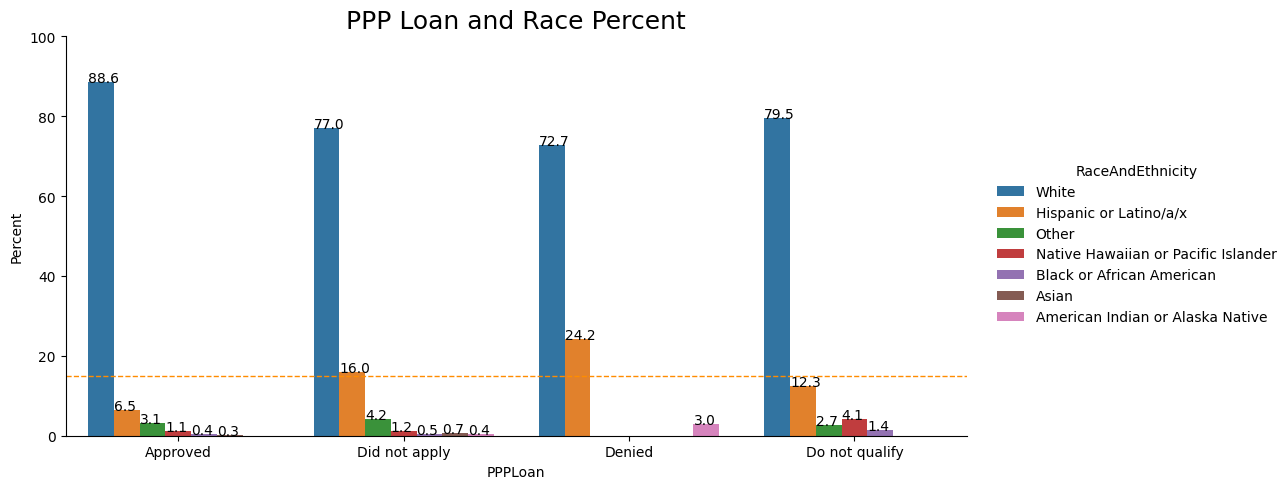

In [21]:
# convert to percentages
new_df = df_clean.groupby('PPPLoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='PPPLoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1))
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('PPP Loan and Race Percent', fontsize=18)
g.map(plt.axhline, y=15, ls='--', color='darkorange', linewidth=1)

In [22]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [23]:
df_clean['Education'] = pd.Categorical(df_clean['Education'],
                                         categories = ['Less than high school', 'High school graduate or GED', 'Some college',
                                                       'Associates degree', 'Bachelors degree', 'Masters degree', 'Doctorate'],
                                         ordered = True)

In [24]:
df_clean['RaceAndEthnicity'] = pd.Categorical(df_clean['RaceAndEthnicity'],
                                         categories = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
                                                       'Native Hawaiian or Pacific Islander', 'American Indian or Alaskan Native', 'Other'],
                                         ordered = True)

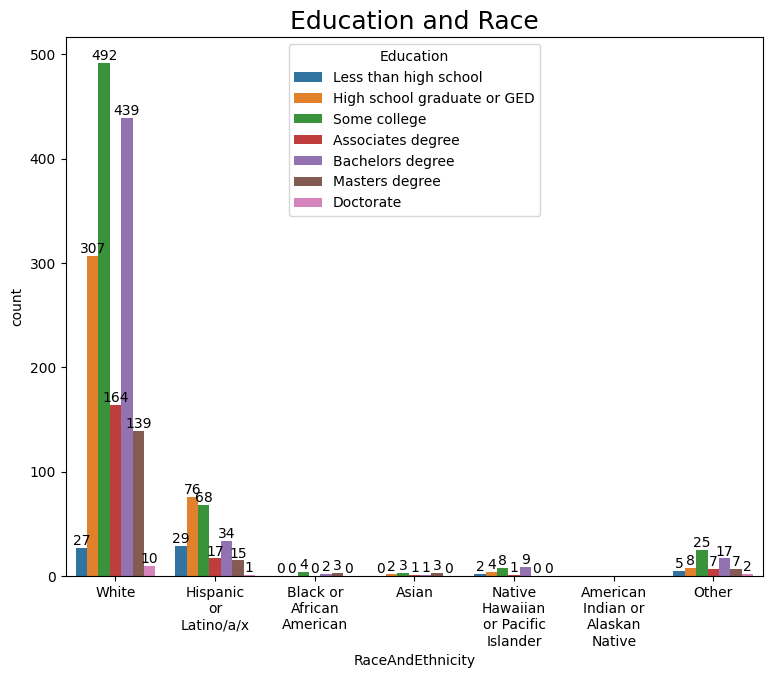

In [25]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'Education', data = df_clean)
#Add title
plt.title('Education and Race', fontsize=18)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [26]:
# # convert to percentages
# new_df = df_clean.groupby('RaceAndEthnicity')['Education'].value_counts(normalize=True)
# new_df = new_df.mul(100).rename('Percent').reset_index()

# g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='level_1', kind='bar', data=new_df, height=5, aspect = 2)
# g.ax.set_ylim(0,50)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(1))
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

# plt.title('Education and Race Percent', fontsize=18)

# wrap_labels(g.ax, 10)

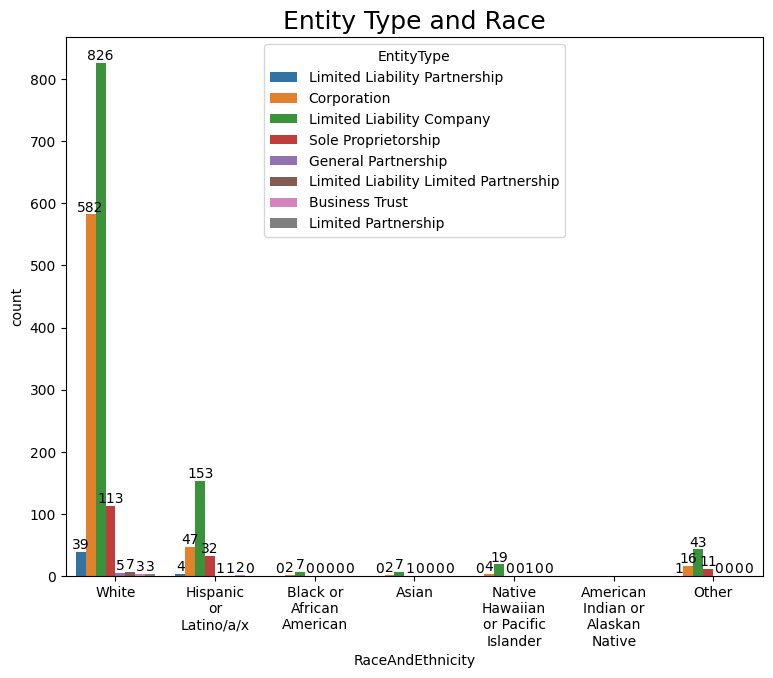

In [27]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EntityType', data = df_clean)
#Add title
plt.title('Entity Type and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [28]:
df_clean['EntityType'].unique()

array(['Limited Liability Partnership', 'Corporation',
       'Limited Liability Company', 'Sole Proprietorship',
       'General Partnership', 'Limited Liability Limited Partnership',
       'Business Trust', 'Limited Partnership'], dtype=object)

In [29]:
# df_clean['EntityType'] = pd.Categorical(df_clean['EntityType'],
#                                          categories = ['Limited Liability Partnership', 'Corporation',
#                                                        'Limited Liability Company', 'Sole Proprietorship',
#                                                        'General Partnership', 'Limited Liability Limited Partnership',
#                                                        'Business Trust', 'I am RETIRED', 'Limited Partnership'],
#                                          ordered = True)

In [30]:
# # convert to percentages
# new_df = df_clean.groupby('RaceAndEthnicity')['EntityType'].value_counts(normalize=True)
# new_df = new_df.mul(100).rename('Percent').reset_index()

# g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='level_1', kind='bar', data=new_df, height=5, aspect = 2)
# g.ax.set_ylim(0,100)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(1))
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

# plt.title('EntityType and Race Percent', fontsize=18)

# wrap_labels(g.ax, 10)

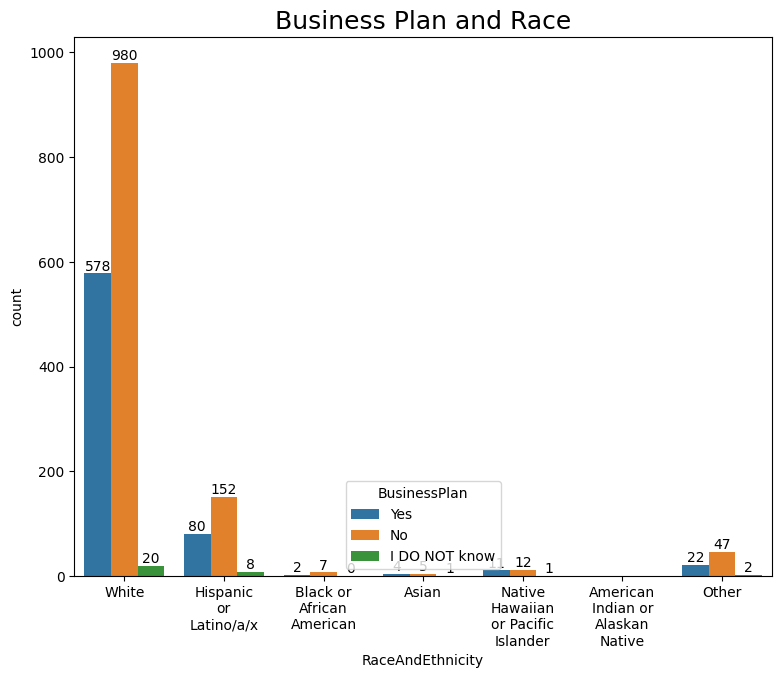

In [31]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'BusinessPlan', data = df_clean)
#Add title
plt.title('Business Plan and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

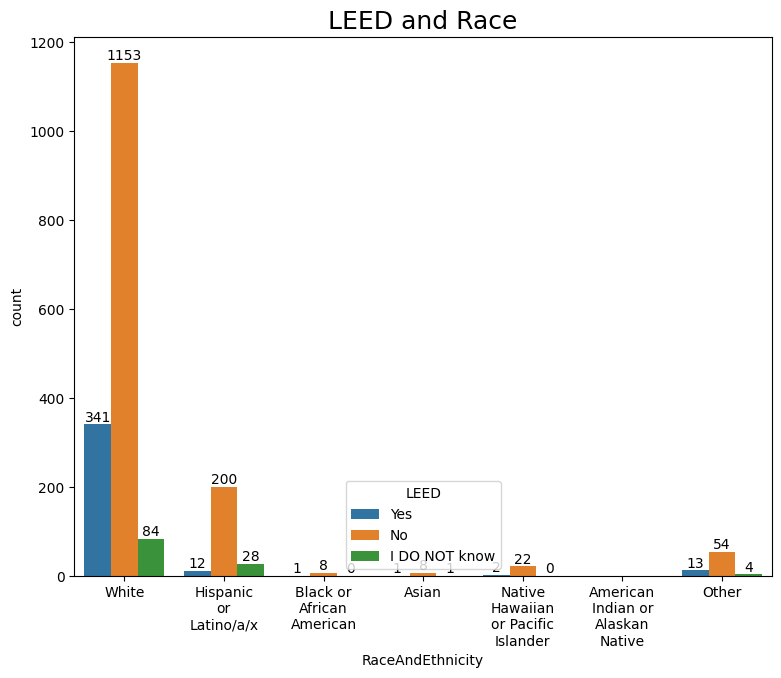

In [32]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'LEED', data = df_clean)
#Add title
plt.title('LEED and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

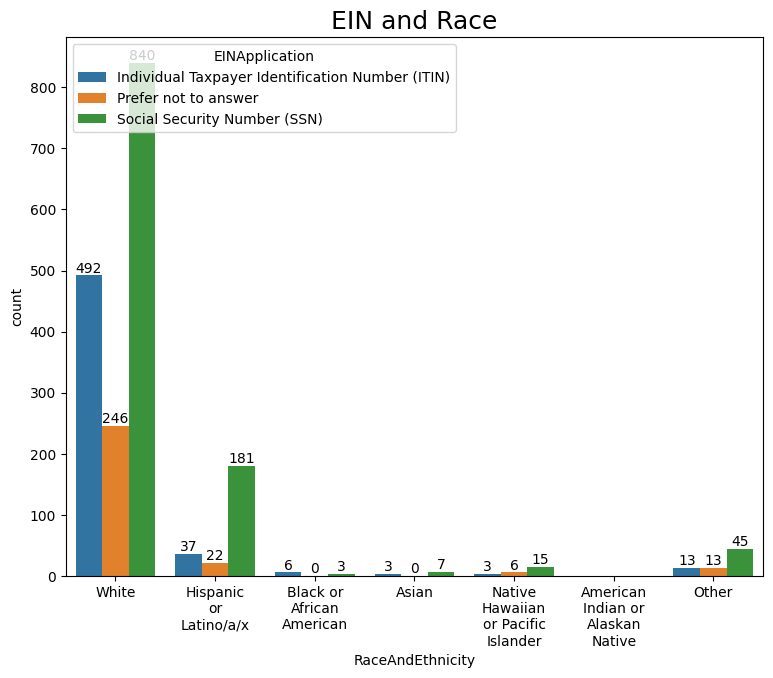

In [33]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EINApplication', data = df_clean)
#Add title
plt.title('EIN and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [34]:
# df_clean['EnglishLanguage'] = pd.Categorical(df_clean['EnglishLanguage'],
#                                          categories = ['Yes','No','Prefer not to say'],
#                                          ordered = True)

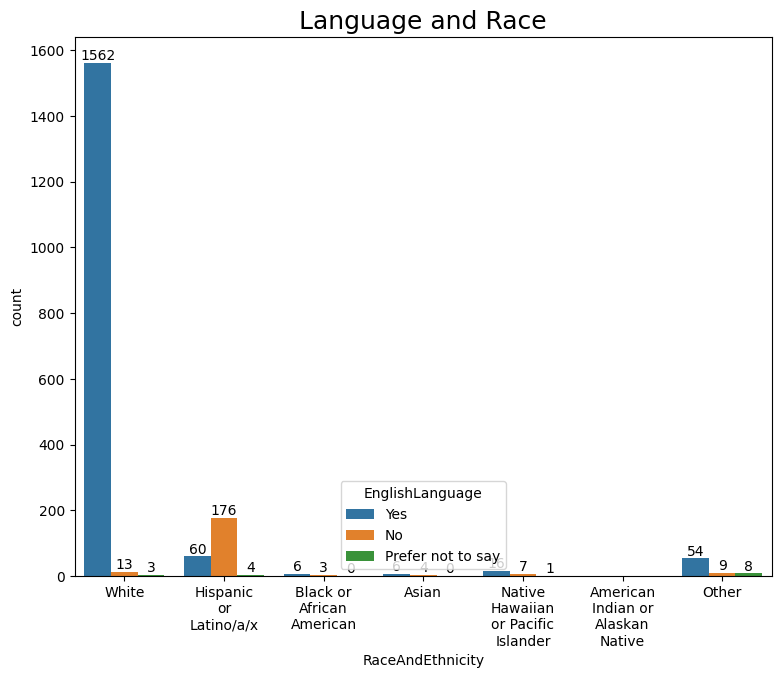

In [35]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EnglishLanguage', data = df_clean)
#Add title
plt.title('Language and Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [36]:
# convert to percentages
# new_df = df_clean.groupby('RaceAndEthnicity')['EnglishLanguage'].value_counts(normalize=True)
# new_df = new_df.mul(100).rename('Percent').reset_index()

# g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='level_1', kind='bar', data=new_df, height=5, aspect = 1.5)
# g.ax.set_ylim(0,100)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(1))
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

# plt.title('English Language and Race Percent', fontsize=18)

# wrap_labels(g.ax, 10)

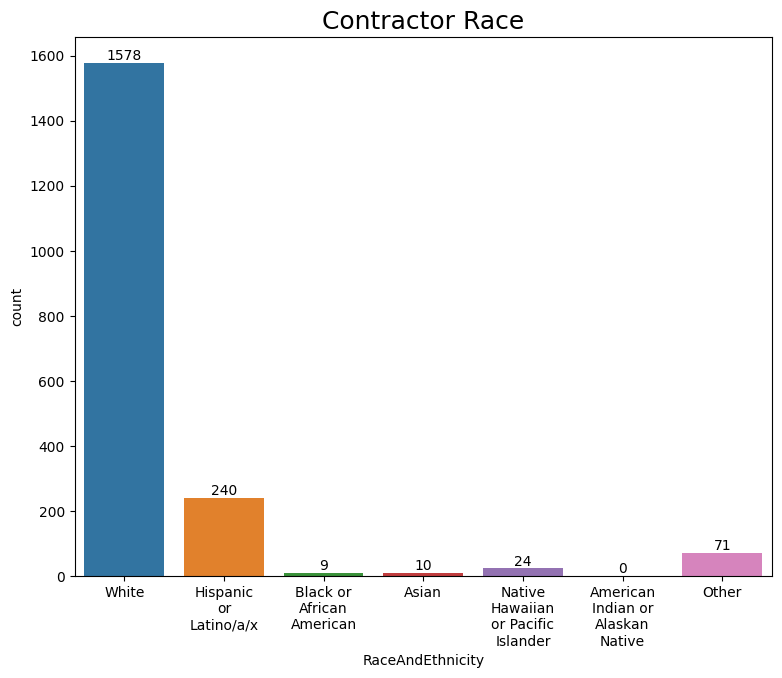

In [37]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Contractor Race', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [38]:
# new_df = df_clean.groupby('RaceAndEthnicity').count()
# # new_df = new_df.mul(100).rename('Percent').reset_index()

# print(df_clean)

# g = sns.catplot(x='RaceAndEthnicity', y='Percent', kind='bar', data=new_df, height=5, aspect = 1.5)
# g.ax.set_ylim(0,100)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(1))
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

# plt.title('Race and Ethnicity Percent', fontsize=18)

# wrap_labels(g.ax, 10)

# Regression Analyss

In [39]:
# create data frame for regression

df_reg = df_clean
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 8 to 2507
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   StartDate                1937 non-null   object  
 1   EndDate                  1937 non-null   object  
 2   Status                   1937 non-null   object  
 3   IPAddress                1937 non-null   object  
 4   Progress                 1937 non-null   object  
 5   Duration (in seconds)    1937 non-null   object  
 6   Finished                 1937 non-null   object  
 7   RecordedDate             1937 non-null   object  
 8   ResponseId               1937 non-null   object  
 9   RecipientLastName        0 non-null      object  
 10  RecipientFirstName       0 non-null      object  
 11  RecipientEmail           0 non-null      object  
 12  ExternalReference        0 non-null      object  
 13  LocationLatitude         1928 non-null   object  
 14  Location

In [40]:
# clean data
# drop columns
df_reg = df_reg.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q23_7_TEXT', 'Q21_8_TEXT', 'PhoneNumber'], axis=1)

In [41]:
# change license classification categories to numerical
df_reg.loc[df_reg['LicenseClassification'] == 'B-100: General Building', 'LicenseClassification'] = "1" 
df_reg.loc[df_reg['LicenseClassification'] == 'R-100: Residential/Small Commercial', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'R-101: Residential/Small Commercial Non-Structural Remodel/Repair', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-100: General Engineering', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-200: General Electrical', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'P-200: General Plumbing Contractor', 'LicenseClassification'] = "1"

df_reg.loc[df_reg['LicenseClassification'] == 'R-200: Factory Built Housing', 'LicenseClassification'] = "0" 
df_reg.loc[df_reg['LicenseClassification'] == 'E-201: Residential Electrical', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'P-201: Residential Plumbing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-202: Solar Photovoltaic', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-220: Carpentry & Flooring', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-230: Masonry, Siding, Stucco, Glass, and Rain Gutter', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-260: Asphalt & Concrete', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-270: Drywall, Paint, and Plastering', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-280: Roofing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-310: Foundation, Excavation, and Demolition', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-330: Landscape & Recreation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-350: HVAC', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-370: Fire Suppression Systems', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-410: Boiler, Pipelines, Waste Water, and Water Conditioner', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-440: Sign Installation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-700: Limited Scope', 'LicenseClassification'] = "0"

df_reg['LicenseClassification'] = df_reg['LicenseClassification'].astype('int')

In [42]:
# change latinx shareholders > 50 percent
df_reg.loc[df_reg['LatinxShareholders'] == 'Yes', 'LatinxShareholders'] = "1"
df_reg.loc[df_reg['LatinxShareholders'] == 'No', 'LatinxShareholders'] = "0"
df_reg.loc[df_reg['LatinxShareholders'] == 'I DO NOT know', 'LatinxShareholders'] = "0"

df_reg['LatinxShareholders'] = df_reg['LatinxShareholders'].astype('int')

In [43]:
# change SBA Loan
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Approved','1')  
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Denied','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Did not apply','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['SBALoan'] = df_reg['SBALoan'].astype('int')


In [44]:
# change PPP Loan
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Approved','1')  
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Denied','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Did not apply','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['PPPLoan'] = df_reg['PPPLoan'].astype('int')

In [45]:
# change Bank Credit Union Loan
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Approved','1')  
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Denied','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Did not apply','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].astype('int')

In [46]:
# change Accountant CPA
df_reg.loc[df_reg['AccountantCPA'] == 'Yes', 'AccountantCPA'] = "1"
df_reg.loc[df_reg['AccountantCPA'] == 'No', 'AccountantCPA'] = "0"
df_reg.loc[df_reg['AccountantCPA'] == 'I DO NOT know', 'AccountantCPA'] = "0"

# Convert to integer
df_reg['AccountantCPA'] = df_reg['AccountantCPA'].astype('int')

In [47]:
# change business plan
df_reg.loc[df_reg['BusinessPlan'] == 'Yes', 'BusinessPlan'] = "1"
df_reg.loc[df_reg['BusinessPlan'] == 'No', 'BusinessPlan'] = "0"
df_reg.loc[df_reg['BusinessPlan'] == 'I DO NOT know', 'BusinessPlan'] = "0"

# Convert to integer
df_reg['BusinessPlan'] = df_reg['BusinessPlan'].astype('int')

In [48]:
# change gender
df_reg.loc[df_reg['Gender'] == 'Male', 'Gender'] = "1"
df_reg.loc[df_reg['Gender'] == 'Female', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Non-binary / third gender', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Prefer not to say', 'Gender'] = "0"

# Convert to integer
df_reg['Gender'] = df_reg['Gender'].astype('int')


In [49]:
# change outstanding debt
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$0', 'TotalOutstandingDebt'] = "0"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k or less', 'TotalOutstandingDebt'] = "15"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k-$100k', 'TotalOutstandingDebt'] = "75"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$100k-$250k', 'TotalOutstandingDebt'] = "175"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$250k-$1M', 'TotalOutstandingDebt'] = "750"
df_reg.loc[df_reg['TotalOutstandingDebt'] == 'More than $1M', 'TotalOutstandingDebt'] = "1500"

# Convert to integer
df_reg['TotalOutstandingDebt'] = df_reg['TotalOutstandingDebt'].astype('int')

In [50]:
# change Revenue
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$0','0', regex=True)  
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k or less','15', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k \- \$100k','75', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$100k \- \$250k','175', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$250k \- \$1M','750', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('More than \$1M','1500', regex=True)

#Convert to integer
df_reg['Revenue2022'] = df_reg['Revenue2022'].astype('int')

In [51]:
# change homeowner
df_reg.loc[df_reg['HomeOwner'] == 'Yes', 'HomeOwner'] = "1"
df_reg.loc[df_reg['HomeOwner'] == 'No', 'HomeOwner'] = "0"
df_reg.loc[df_reg['HomeOwner'] == 'Prefer not to say', 'HomeOwner'] = "0"

# Convert to integer
df_reg['HomeOwner'] = df_reg['HomeOwner'].astype('int')


In [52]:
# change LEED
df_reg.loc[df_reg['LEED'] == 'Yes', 'LEED'] = "1"
df_reg.loc[df_reg['LEED'] == 'No', 'LEED'] = "0"
df_reg.loc[df_reg['LEED'] == 'I DO NOT know', 'LEED'] = "0"

# Convert to integer
df_reg['LEED'] = df_reg['LEED'].astype('int')


In [53]:
# change number of employees
df_reg.loc[df_reg['NumOfEmployees'] == '0 or Family', 'NumOfEmployees'] = "0"
df_reg.loc[df_reg['NumOfEmployees'] == 'Less than 5', 'NumOfEmployees'] = "5"
df_reg.loc[df_reg['NumOfEmployees'] == '5-10', 'NumOfEmployees'] = "10"
df_reg.loc[df_reg['NumOfEmployees'] == '11-20', 'NumOfEmployees'] = "15"
df_reg.loc[df_reg['NumOfEmployees'] == '20+', 'NumOfEmployees'] = "25"

# Convert to integer
df_reg['NumOfEmployees'] = df_reg['NumOfEmployees'].astype('int')


In [54]:
# change work accident
df_reg.loc[df_reg['WorkAccidents'] == 'None', 'WorkAccidents'] = "0"
df_reg.loc[df_reg['WorkAccidents'] == '20+', 'WorkAccidents'] = "25"

# Convert to integer
df_reg['WorkAccidents'] = df_reg['WorkAccidents'].astype('int')


In [55]:
# change years of work experience
df_reg.loc[df_reg['YearsofExperience'] == 'less than 1 year', 'YearsofExperience'] = "0"
df_reg.loc[df_reg['YearsofExperience'] == '60+', 'YearsofExperience'] = "60"

# Convert to integer
df_reg['YearsofExperience'] = df_reg['YearsofExperience'].astype('int')


In [56]:
#change english language
df_reg.loc[df_reg['EnglishLanguage'] == 'Yes', 'EnglishLanguage'] = "1"
df_reg.loc[df_reg['EnglishLanguage'] == 'No', 'EnglishLanguage'] = "0"
df_reg.loc[df_reg['EnglishLanguage'] == 'Prefer not to say', 'EnglishLanguage'] = "0"

# Convert to integer
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].astype('int')


In [57]:
# change EIN
df_reg.loc[df_reg['EINApplication'] == 'Social Security Number (SSN)', 'EINApplication'] = "1"
df_reg.loc[df_reg['EINApplication'] == 'Individual Taxpayer Identification Number (ITIN)', 'EINApplication'] = "0"
df_reg.loc[df_reg['EINApplication'] == 'Prefer not to answer', 'EINApplication'] = "0"

# Convert to integer
df_reg['EINApplication'] = df_reg['EINApplication'].astype('int')


In [58]:
# change Latinx Employees Percent
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '0%', 'LatinxEmployeesPercent'] = "0"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == 'Less than 25%', 'LatinxEmployeesPercent'] = "1"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '25-50%', 'LatinxEmployeesPercent'] = "2"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '51-75%', 'LatinxEmployeesPercent'] = "3"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '76-100%', 'LatinxEmployeesPercent'] = "4"

# Convert to integer
df_reg['LatinxEmployeesPercent'] = df_reg['LatinxEmployeesPercent'].astype('int')


In [59]:
# change entity type
df_reg.loc[df_reg['EntityType'] == 'Limited Liability Company', 'LLC'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Company', 'LLC'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Sole Proprietorship', 'SoleP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Sole Proprietorship', 'SoleP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Partnership', 'LP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Partnership', 'LP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Liability Partnership', 'LLP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Partnership', 'LLP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Liability Limited Partnership', 'LLLP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Limited Partnership', 'LLLP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Corporation', 'Corp'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Corporation', 'Corp'] = "0"

df_reg.loc[df_reg['EntityType'] == 'General Partnership', 'GenP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'General Partnership', 'GenP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Business Trust', 'BTrust'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Business Trust', 'BTrust'] = "0"

# Convert to integer
df_reg['LLC'] = df_reg['LLC'].astype('int')
df_reg['SoleP'] = df_reg['SoleP'].astype('int')
df_reg['LP'] = df_reg['LP'].astype('int')
df_reg['LLP'] = df_reg['LLP'].astype('int')
df_reg['LLLP'] = df_reg['LLLP'].astype('int')
df_reg['Corp'] = df_reg['Corp'].astype('int')
df_reg['GenP'] = df_reg['GenP'].astype('int')
df_reg['BTrust'] = df_reg['BTrust'].astype('int')


In [60]:
# change education
df_reg.loc[df_reg['Education'] == 'High school graduate or GED', 'HighSchool'] = "1"
df_reg.loc[df_reg['Education'] != 'High school graduate or GED', 'HighSchool'] = "0"

df_reg.loc[df_reg['Education'] == 'Some college', 'SomeCollege'] = "1"
df_reg.loc[df_reg['Education'] != 'Some college', 'SomeCollege'] = "0"

df_reg.loc[df_reg['Education'] == 'Associates degree', 'Associate'] = "1"
df_reg.loc[df_reg['Education'] != 'Associates degree', 'Associate'] = "0"

df_reg.loc[df_reg['Education'] == 'Bachelors degree', 'Bachelor'] = "1"
df_reg.loc[df_reg['Education'] != 'Bachelors degree', 'Bachelor'] = "0"

df_reg.loc[df_reg['Education'] == 'Masters degree', 'Master'] = "1"
df_reg.loc[df_reg['Education'] != 'Masters degree', 'Master'] = "0"

df_reg.loc[df_reg['Education'] == 'Doctorate', 'Doctorate'] = "1"
df_reg.loc[df_reg['Education'] != 'Doctorate', 'Doctorate'] = "0"

# convert to integer

df_reg['HighSchool'] = df_reg['HighSchool'].astype('int')
df_reg['SomeCollege'] = df_reg['SomeCollege'].astype('int')
df_reg['Associate'] = df_reg['Associate'].astype('int')
df_reg['Bachelor'] = df_reg['Bachelor'].astype('int')
df_reg['Master'] = df_reg['Master'].astype('int')
df_reg['Doctorate'] = df_reg['Doctorate'].astype('int')


In [61]:
# change race and ethnicity
df_reg.loc[df_reg['RaceAndEthnicity'] == 'White', 'White'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'White', 'White'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Hispanic or Latino/a/x', 'Latinx'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Hispanic or Latino/a/x', 'Latinx'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Black or African American', 'Black'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Black or African American', 'Black'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'American Indian or Alaska Native', 'NativeAmerican'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'American Indian or Alaska Native', 'NativeAmerican'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Asian', 'Asian'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Asian', 'Asian'] = "0"

# convert to integer
df_reg['White'] = df_reg['White'].astype('int')
df_reg['Latinx'] = df_reg['Latinx'].astype('int')
df_reg['Black'] = df_reg['Black'].astype('int')
df_reg['PacificIslander'] = df_reg['PacificIslander'].astype('int')
df_reg['NativeAmerican'] = df_reg['NativeAmerican'].astype('int')
df_reg['Asian'] = df_reg['Asian'].astype('int')

In [62]:
# change construction focus
df_reg.loc[df_reg['ConstructionFocus'] == 'Residential', 'Residential'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Residential', 'Residential'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Commercial', 'Commercial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Commercial', 'Commercial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Industrial', 'Industrial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Industrial', 'Industrial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Infrastructure', 'Infrastructure'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Infrastructure', 'Infrastructure'] = "0"

# convert to integer
df_reg['Residential'] = df_reg['Residential'].astype('int')
df_reg['Commercial'] = df_reg['Commercial'].astype('int')
df_reg['Industrial'] = df_reg['Industrial'].astype('int')
df_reg['Infrastructure'] = df_reg['Infrastructure'].astype('int')

In [63]:
# change age

df_reg.loc[df_reg['Age'] == '18 - 24', 'Age'] = "18"
df_reg.loc[df_reg['Age'] == '25 - 34', 'Age'] = "25"
df_reg.loc[df_reg['Age'] == '35 - 44', 'Age'] = "35"
df_reg.loc[df_reg['Age'] == '45 - 54', 'Age'] = "45"
df_reg.loc[df_reg['Age'] == '55 - 64', 'Age'] = "55"
df_reg.loc[df_reg['Age'] == '65 - 74', 'Age'] = "65"
df_reg.loc[df_reg['Age'] == '75 - 84', 'Age'] = "75"
df_reg.loc[df_reg['Age'] == '85 or older', 'Age'] = "85"

# # convert to integer
df_reg['Age'] = df_reg['Age'].astype('int')

df_reg['Age'].unique()

array([35, 75, 25, 45, 65, 55, 18, 85])

In [64]:
# change Credit Score

df_reg.loc[df_reg['CreditScore'] == 'less than 620', 'CreditScore'] = "460"
df_reg.loc[df_reg['CreditScore'] == '620-719', 'CreditScore'] = "670"
df_reg.loc[df_reg['CreditScore'] == '720+', 'CreditScore'] = "785"
df_reg.loc[df_reg['CreditScore'] == 'Prefer not to say', 'CreditScore'] = "670"


# # # convert to integer
df_reg['CreditScore'] = df_reg['CreditScore'].astype('int')

df_reg['CreditScore'].unique()

array([785, 670, 460])

In [65]:
# change Loan Officer Relationship

df_reg.loc[df_reg['LoanOfficerRelationship'] == 'No Relationship', 'LoanOfficerRelationship'] = "0"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Terrible', 'LoanOfficerRelationship'] = "1"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Poor', 'LoanOfficerRelationship'] = "2"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Average', 'LoanOfficerRelationship'] = "3"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Good', 'LoanOfficerRelationship'] = "4"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Excellent', 'LoanOfficerRelationship'] = "5"

# convert to integer
df_reg['LoanOfficerRelationship'] = df_reg['LoanOfficerRelationship'].astype('int')


In [66]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 8 to 2507
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LicenseClassification    1937 non-null   int64   
 1   EntityType               1937 non-null   object  
 2   LatinxShareholders       1937 non-null   int64   
 3   Age                      1937 non-null   int64   
 4   RaceAndEthnicity         1932 non-null   category
 5   Gender                   1937 non-null   int64   
 6   Education                1937 non-null   category
 7   CreditScore              1937 non-null   int64   
 8   HomeOwner                1937 non-null   int64   
 9   EnglishLanguage          1937 non-null   int64   
 10  YearsofExperience        1937 non-null   int64   
 11  ConstructionFocus        1937 non-null   object  
 12  LEED                     1937 non-null   int64   
 13  BusinessPlan             1937 non-null   int64   
 14  EINAppli

In [67]:
# establish independent and dependent variables


# x = reduced columns to those that are statistically significant
x = df_reg[['LicenseClassification', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'Age',
       'BusinessPlan', 'NumOfEmployees', 'CreditScore', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'TotalOutstandingDebt', 'SoleP', 'LLC', 'Corp', 'Bachelor', 'Master',
       'White', 'Latinx', 'Black', 'Residential', 'Commercial','Industrial']]

# x = all columns included 

# x = df_reg[['LicenseClassification', 'LatinxShareholders', 'Gender', 'HomeOwner',
#        'EnglishLanguage', 'YearsofExperience', 'Age', 'LEED',
#        'BusinessPlan', 'EINApplication', 'NumOfEmployees',
#        'LatinxEmployeesPercent', 'WorkAccidents', 'CreditScore', 'SBALoan', 'PPPLoan',
#        'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
#        'TotalOutstandingDebt', 'LLC', 'SoleP', 'LP', 'LLP', 'LLLP', 'Corp',
#        'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
#        'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
#        'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
#        'Infrastructure']]

# omitted in x for regression analysis
# 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

y = df_reg['Revenue2022']




In [68]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


# regression on revenue 

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue2022   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     97.04
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          4.02e-309
Time:                        22:54:22   Log-Likelihood:                -14433.
No. Observations:                1937   AIC:                         2.892e+04
Df Residuals:                    1912   BIC:                         2.905e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [69]:
# establish independent and dependent variables

# x equals statistically significant variables 
x_credit = df_reg[['Gender', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'BusinessPlan',
       'EINApplication', 'NumOfEmployees',
       'WorkAccidents', 'CreditScore', 'SBALoan', 'PPPLoan',
       'LoanOfficerRelationship', 'AccountantCPA', 'Revenue2022', 'TotalOutstandingDebt',  
       'SoleP', 'LLC', 'Corp',
       'Bachelor', 'Master', 'White', 'Latinx', 'Black',
       'Residential', 'Commercial', 'Industrial',]]

# x equals all columns 
# x_credit = df_reg[['LicenseClassification', 'LatinxShareholders', 'Gender', 'HomeOwner',
#        'EnglishLanguage', 'YearsofExperience', 'Age', 'LEED',
#        'BusinessPlan', 'EINApplication', 'NumOfEmployees',
#        'LatinxEmployeesPercent', 'WorkAccidents', 'CreditScore', 'SBALoan', 'PPPLoan',
#        'LoanOfficerRelationship', 'AccountantCPA', 'Revenue2022',
#        'TotalOutstandingDebt', 'LLC', 'SoleP', 'LP', 'LLP', 'LLLP', 'Corp',
#        'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
#        'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
#        'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
#        'Infrastructure']]

# omit
# 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

# not yet converted to integer
# 'Age', 'CreditScore',  'LoanOfficerRelationship',
y_credit = df_reg['BankCreditUnionLoan']

In [70]:
# regression on Bank/Credit Union Loan Approval

xC = sm.add_constant(x_credit)
est_credit = sm.OLS(y_credit, xC)
est2_credit = est_credit.fit()
print(est2_credit.summary())

                             OLS Regression Results                            
Dep. Variable:     BankCreditUnionLoan   R-squared:                       0.286
Model:                             OLS   Adj. R-squared:                  0.276
Method:                  Least Squares   F-statistic:                     29.43
Date:                 Mon, 17 Apr 2023   Prob (F-statistic):          7.69e-120
Time:                         22:54:22   Log-Likelihood:                -1009.2
No. Observations:                 1937   AIC:                             2072.
Df Residuals:                     1910   BIC:                             2223.
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [71]:
df_reg['EnglishLanguage'].describe()

count    1937.000000
mean        0.882292
std         0.322345
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: EnglishLanguage, dtype: float64

## Correlatoin Matix

In [72]:
dataframe = pd.DataFrame(df_reg, columns = ['LicenseClassification', 'LatinxShareholders', 'Gender', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'AccountantCPA',
       'TotalOutstandingDebt', 'LLC', 'SoleP', 'LP', 'LLP', 'LLLP', 'Corp',
       'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure','Revenue'])

# corr_matrix = dataframe.corr()
# print("Correlation matrix is : ")

# sns.heatmap(dataframe.corr(), linewidths=0.01);
# # print(corr_matrix)

# print(corr_matrix)

# 0.5-0.75 is too correlated

In [73]:
dataframe = pd.DataFrame(df_reg, columns = ['NumOfEmployees', 'PPPLoan',])

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

# sns.heatmap(dataframe.corr(), linewidths=0.01);
# # print(corr_matrix)

# print(corr_matrix)

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

print(corr_matrix)

# 0.5-0.75 is too correlated

Correlation matrix is : 
Correlation matrix is : 
                NumOfEmployees   PPPLoan
NumOfEmployees        1.000000  0.460231
PPPLoan               0.460231  1.000000
